In [ ]:
# prompt: get a file on my deskop called healthcare.csv and save it to a data frame called df_health

from google.colab import files

uploaded = files.upload()

import pandas as pd

# Try reading the file with a different encoding, like 'latin-1'
df_health = pd.read_csv("Healthcare.csv", encoding='latin-1')

# Print the first few rows of the DataFrame
df_health.head()


Saving Healthcare.csv to Healthcare.csv


,Timestamp,Age,Gender,Marital Status,"How many children do you have, if any?",Employment Status,Monthly Household Income,Have you ever had health insurance?,"If yes, which insurance cover?",When was the last time you visited a hospital for medical treatment? (In Months),Did you have health insurance during your last hospital visit?,Have you ever had a routine check-up with a doctor or healthcare provider?,"If you answered yes to the previous question, what time period (in years) do you stay before having your routine check-up?","Have you ever had a cancer screening (e.g. mammogram, colonoscopy, etc.)?","If you answered yes to the previous question, what time period (in years) do you stay before having your Cancer screening?",GeoCode,GeoAddress,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,5/14/2024 10:09:43,18-30,Male,Single,NaN,Student,Less than 10000,Yes,Amaco insurance,2022,No,No,NaN,No,NaN,"-1.2852333,36.8556432","Mvuma Nyuki Street, Off Ole Sinoni Road, PV74+...",NaN,NaN,NaN
1,5/14/2024 10:16:53,18-30,Male,Single,NaN,Student,10001-20000,No,NaN,10 months,No,No,NaN,No,NaN,"-0.7274496,37.158912","75F5+5GC, Murang'a, Kenya",NaN,NaN,NaN
2,5/14/2024 10:21:34,18-30,Male,Single,NaN,Unemployed,Less than 10000,No,NaN,Apr-24,No,No,NaN,No,NaN,"-0.7284222,37.1501468","C71, Kenya",NaN,NaN,NaN
3,5/14/2024 10:27:40,18-30,Male,Single,NaN,Unemployed,Less than 10000,No,NaN,11,No,No,NaN,No,NaN,"-1.2852333,36.8556432","Mvuma Nyuki Street, Off Ole Sinoni Road, PV74+...",NaN,NaN,NaN
4,5/14/2024 10:34:20,18-30,Male,Single,0,Student,Less than 10000,No,NaN,12,No,No,NaN,No,NaN,"-1.2841,36.8155","Kenyatta Market, PR88+959, Nairobi, Kenya",NaN,NaN,NaN


In [ ]:
df_healthcare = df_health.copy()

In [ ]:
#Shorten the names for redability.
# Dictionary mapping original column names to shortened names
column_mapping = {
    'Timestamp': 'Timestamp',
    'Age': 'Age',
    'Gender': 'Gender',
    'Marital Status': 'Marital_Status',
    'How many children do you have, if any?': 'Children',
    'Employment Status': 'Employment_Status',
    'Monthly Household Income': 'Monthly_Income',
    'Have you ever had health insurance?': 'Had_Health_Insurance',
    'If yes, which insurance cover?': 'Insurance_Cover',
    'When was the last time you visited a hospital for medical treatment? (In Months)': 'Last_Hospital_Visit_Months',
    'Did you have health insurance during your last hospital visit?': 'Had_Insurance_Last_Visit',
    'Have you ever had a routine check-up with a doctor or healthcare provider?': 'Had_Routine_Checkup',
    'If you answered yes to the previous question, what time period (in years) do you stay before having your routine check-up?': 'Routine_Checkup_Period_Years',
    'Have you ever had a cancer screening (e.g. mammogram, colonoscopy, etc.)?': 'Had_Cancer_Screening',
    'If you answered yes to the previous question, what time period (in years) do you stay before having your Cancer screening?': 'Cancer_Screening_Period_Years',
    'GeoCode': 'GeoCode',
    'GeoAddress': 'GeoAddress'
}

# Rename columns using the mapping dictionary
df_healthcare = df_healthcare.rename(columns=column_mapping)

# Print the updated column names to verify
print("Updated column names:")
print(df_healthcare.columns)


Updated column names:
Index(['Timestamp', 'Age', 'Gender', 'Marital_Status', 'Children',
       'Employment_Status', 'Monthly_Income', 'Had_Health_Insurance',
       'Insurance_Cover', 'Last_Hospital_Visit_Months',
       'Had_Insurance_Last_Visit', 'Had_Routine_Checkup',
       'Routine_Checkup_Period_Years', 'Had_Cancer_Screening',
       'Cancer_Screening_Period_Years', 'GeoCode', 'GeoAddress', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19'],
      dtype='object')


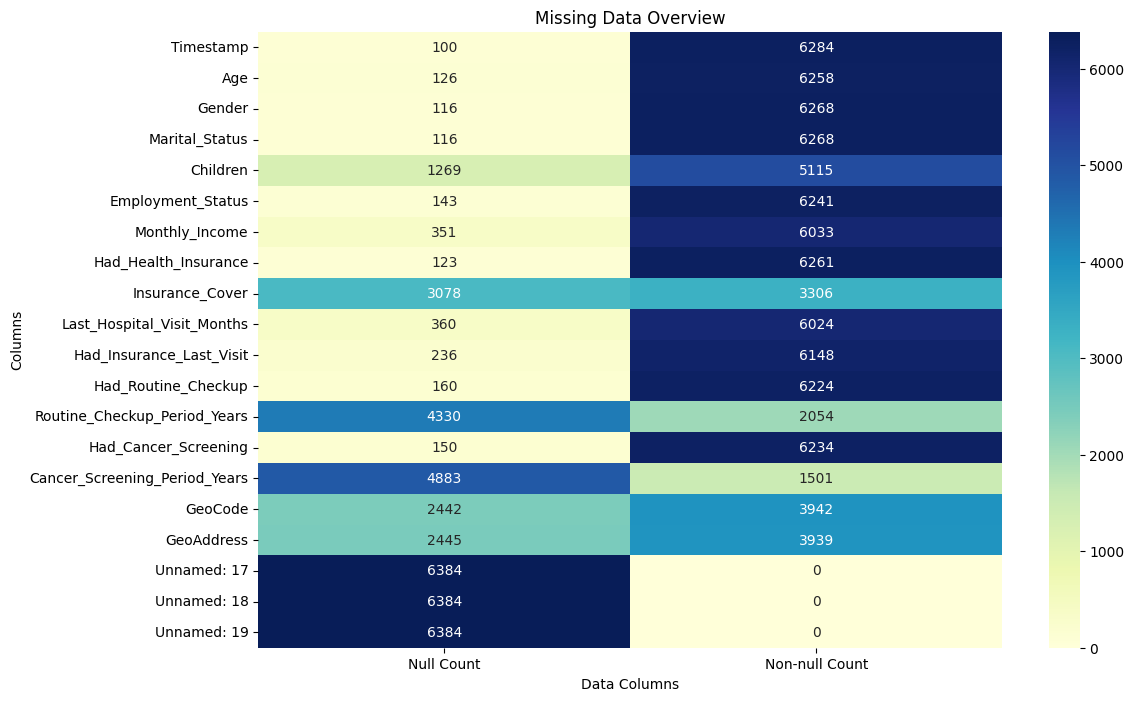

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df_healthcare is your dataframe
# Generate a boolean dataframe indicating null values
null_matrix = df_healthcare.isnull()

# Calculate the percentage of null values in each column
null_percentages = (null_matrix.sum() / null_matrix.shape[0]) * 100

# Create a dataframe combining null counts and percentages
null_summary = pd.DataFrame({'Null Count': null_matrix.sum(), 'Null Percentage': null_percentages})

# Add a column for non-null count
null_summary['Non-null Count'] = df_healthcare.shape[0] - null_summary['Null Count']

# Create a heatmap using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(null_summary[['Null Count', 'Non-null Count']], annot=True, fmt='d', cmap='YlGnBu', cbar=True)
plt.title('Missing Data Overview')
plt.xlabel('Data Columns')
plt.ylabel('Columns')
plt.show()


In [ ]:
df_healthcare.isnull().sum()

Timestamp                         100
Age                               126
Gender                            116
Marital_Status                    116
Children                         1269
Employment_Status                 143
Monthly_Income                    351
Had_Health_Insurance              123
Insurance_Cover                  3078
Last_Hospital_Visit_Months        360
Had_Insurance_Last_Visit          236
Had_Routine_Checkup               160
Routine_Checkup_Period_Years     4330
Had_Cancer_Screening              150
Cancer_Screening_Period_Years    4883
GeoCode                          2442
GeoAddress                       2445
Unnamed: 17                      6384
Unnamed: 18                      6384
Unnamed: 19                      6384
dtype: int64

In [ ]:
import pandas as pd

# Assuming df_healthcare is your dataframe

# List of columns where null values should be removed
columns_to_clean = ['Gender', 'Marital_Status', 'Employment_Status', 'Had_Health_Insurance',
       'Had_Insurance_Last_Visit', 'Had_Routine_Checkup', 'Had_Cancer_Screening', 'Monthly_Income', 'Last_Hospital_Visit_Months']

# Drop rows where any of the specified columns have null values
df_cleaned = df_healthcare.dropna(subset=columns_to_clean)

# Example: Print the shape of cleaned dataframe to see rows removed
print(f"Original dataframe shape: {df_healthcare.shape}")
print(f"Cleaned dataframe shape: {df_cleaned.shape}")

# Optionally, you can reset index if you want
df_cleaned.reset_index(drop=True, inplace=True)

columns_to_drop = ['Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19']

# Drop the specified columns
df_cleaned = df_cleaned.drop(columns=columns_to_drop)

# Now df_cleaned contains rows where 'Gender', 'Marital Status', 'Employment Status',
# 'Have you ever had health insurance?' are not null


Original dataframe shape: (6384, 20)
Cleaned dataframe shape: (5630, 20)


In [ ]:
df_healthcare = df_cleaned.copy()

In [ ]:
df_healthcare.isnull().sum()

Timestamp                           0
Age                                16
Gender                              0
Marital_Status                      0
Children                          959
Employment_Status                   0
Monthly_Income                      0
Had_Health_Insurance                0
Insurance_Cover                  2533
Last_Hospital_Visit_Months          0
Had_Insurance_Last_Visit            0
Had_Routine_Checkup                 0
Routine_Checkup_Period_Years     3714
Had_Cancer_Screening                0
Cancer_Screening_Period_Years    4219
GeoCode                          2098
GeoAddress                       2101
dtype: int64

In [ ]:
df_healthcare['Age'].value_counts()


Age
18-30                  2395
31-40                  1467
41-50                   911
51-60                   477
60+                     320
18-30, 31-40              8
31-40, 41-50              6
18-30, 41-50              6
18-30, 51-60              5
41-50, 51-60              4
51-60, 60+                3
18-30, 60+                3
31-40, 60+                2
31-40, 51-60              2
41-50, 60+                2
31-40, 41-50, 51-60       1
18-30, 41-50, 51-60       1
18-30, 31-40, 41-50       1
Name: count, dtype: int64

In [ ]:
def filter_age_ranges(df):
    """
    Filters the DataFrame to include only rows where the 'Age' column
    matches the specified categories.

    Args:
        df (pd.DataFrame): The input DataFrame.

    Returns:
        pd.DataFrame: Filtered DataFrame.
    """
    valid_ranges = ['18-30', '31-40', '41-50', '51-60', '60+']
    return df[df['Age'].isin(valid_ranges)]

# Apply the filter to the DataFrame
filtered_df_healthcare = filter_age_ranges(df_healthcare)
filtered_df_healthcare.head()

,Timestamp,Age,Gender,Marital_Status,Children,Employment_Status,Monthly_Income,Had_Health_Insurance,Insurance_Cover,Last_Hospital_Visit_Months,Had_Insurance_Last_Visit,Had_Routine_Checkup,Routine_Checkup_Period_Years,Had_Cancer_Screening,Cancer_Screening_Period_Years,GeoCode,GeoAddress
0,5/14/2024 10:09:43,18-30,Male,Single,NaN,Student,Less than 10000,Yes,Amaco insurance,2022,No,No,NaN,No,NaN,"-1.2852333,36.8556432","Mvuma Nyuki Street, Off Ole Sinoni Road, PV74+..."
1,5/14/2024 10:16:53,18-30,Male,Single,NaN,Student,10001-20000,No,NaN,10 months,No,No,NaN,No,NaN,"-0.7274496,37.158912","75F5+5GC, Murang'a, Kenya"
2,5/14/2024 10:21:34,18-30,Male,Single,NaN,Unemployed,Less than 10000,No,NaN,Apr-24,No,No,NaN,No,NaN,"-0.7284222,37.1501468","C71, Kenya"
3,5/14/2024 10:27:40,18-30,Male,Single,NaN,Unemployed,Less than 10000,No,NaN,11,No,No,NaN,No,NaN,"-1.2852333,36.8556432","Mvuma Nyuki Street, Off Ole Sinoni Road, PV74+..."
4,5/14/2024 10:34:20,18-30,Male,Single,0,Student,Less than 10000,No,NaN,12,No,No,NaN,No,NaN,"-1.2841,36.8155","Kenyatta Market, PR88+959, Nairobi, Kenya"


In [ ]:
df_healthcare = filtered_df_healthcare.copy()

In [ ]:
df_healthcare['Age'].value_counts()

Age
18-30    2395
31-40    1467
41-50     911
51-60     477
60+       320
Name: count, dtype: int64

In [ ]:
df = df_healthcare.copy()
df.loc[:, 'Children'] = df['Children'].fillna(0)
df.isnull().sum()

Timestamp                           0
Age                                 0
Gender                              0
Marital_Status                      0
Children                            0
Employment_Status                   0
Monthly_Income                      0
Had_Health_Insurance                0
Insurance_Cover                  2505
Last_Hospital_Visit_Months          0
Had_Insurance_Last_Visit            0
Had_Routine_Checkup                 0
Routine_Checkup_Period_Years     3681
Had_Cancer_Screening                0
Cancer_Screening_Period_Years    4177
GeoCode                          2079
GeoAddress                       2082
dtype: int64

In [ ]:
df_healthcare = df.copy()

In [ ]:
df_healthcare.isnull().sum()

Timestamp                           0
Age                                 0
Gender                              0
Marital_Status                      0
Children                            0
Employment_Status                   0
Monthly_Income                      0
Had_Health_Insurance                0
Insurance_Cover                  2505
Last_Hospital_Visit_Months          0
Had_Insurance_Last_Visit            0
Had_Routine_Checkup                 0
Routine_Checkup_Period_Years     3681
Had_Cancer_Screening                0
Cancer_Screening_Period_Years    4177
GeoCode                          2079
GeoAddress                       2082
dtype: int64

In [ ]:
df_healthcare['Last_Hospital_Visit_Months'].isnull().sum()

0

In [ ]:
df_healthcare['Last_Hospital_Visit_Months'].value_counts()

Last_Hospital_Visit_Months
2                          412
1                          358
3                          342
5                          245
4                          238
                          ... 
Four                         1
17/01/2024                   1
A quarter a month ago        1
5yrs                         1
Approximately 20 months      1
Name: count, Length: 523, dtype: int64

In [ ]:
!pip install fuzzywuzzy

In [ ]:
from datetime import datetime
import re
from fuzzywuzzy import process

def convert_to_months(value, current_date=datetime(2024, 6, 1)):
    try:
        # Check if the value is a string representation of a number less than 1000
        if isinstance(value, str) and value.isdigit() and int(value) < 1000:
            return int(value)

        # Check if the value contains a year
        if isinstance(value, str) and value.isdigit() and int(value) <= current_date.year:
            year = int(value)
            return (current_date.year - year) * 12 + current_date.month

        # Check if the value contains a month name (handle misspellings)
        month_names = ['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december']
        if isinstance(value, str):
            month_name = re.sub(r'[^a-zA-Z]', '', value.lower())  # Remove non-alphabetic characters
            match = process.extractOne(month_name, month_names)
            if match and match[1] >= 80:  # Threshold for similarity score
                month_index = month_names.index(match[0]) + 1
                if month_index > current_date.month:
                    return 12 - (month_index - current_date.month)
                else:
                    return current_date.month - month_index

        # Check if the value contains a number followed by "months ago" or similar
        if isinstance(value, str):
            match = re.search(r'\d+\s*(?:months?)', value.lower())
            if match:
                num_months = int(match.group().split()[0])
                return num_months

    except (ValueError, IndexError):
        pass

    # If the value cannot be converted, return an empty string or NaN
    return ''

In [ ]:
df_healthcare['Last_Hospital_Visit_Months'] = df_healthcare['Last_Hospital_Visit_Months'].apply(convert_to_months)

In [ ]:
df_healthcare.head()

,Timestamp,Age,Gender,Marital_Status,Children,Employment_Status,Monthly_Income,Had_Health_Insurance,Insurance_Cover,Last_Hospital_Visit_Months,Had_Insurance_Last_Visit,Had_Routine_Checkup,Routine_Checkup_Period_Years,Had_Cancer_Screening,Cancer_Screening_Period_Years,GeoCode,GeoAddress
0,5/14/2024 10:09:43,18-30,Male,Single,0,Student,Less than 10000,Yes,Amaco insurance,30,No,No,NaN,No,NaN,"-1.2852333,36.8556432","Mvuma Nyuki Street, Off Ole Sinoni Road, PV74+..."
1,5/14/2024 10:16:53,18-30,Male,Single,0,Student,10001-20000,No,NaN,10,No,No,NaN,No,NaN,"-0.7274496,37.158912","75F5+5GC, Murang'a, Kenya"
2,5/14/2024 10:21:34,18-30,Male,Single,0,Unemployed,Less than 10000,No,NaN,2,No,No,NaN,No,NaN,"-0.7284222,37.1501468","C71, Kenya"
3,5/14/2024 10:27:40,18-30,Male,Single,0,Unemployed,Less than 10000,No,NaN,11,No,No,NaN,No,NaN,"-1.2852333,36.8556432","Mvuma Nyuki Street, Off Ole Sinoni Road, PV74+..."
4,5/14/2024 10:34:20,18-30,Male,Single,0,Student,Less than 10000,No,NaN,12,No,No,NaN,No,NaN,"-1.2841,36.8155","Kenyatta Market, PR88+959, Nairobi, Kenya"


In [ ]:
df_healthcare.isnull().sum()

Timestamp                           0
Age                                 0
Gender                              0
Marital_Status                      0
Children                            0
Employment_Status                   0
Monthly_Income                      0
Had_Health_Insurance                0
Insurance_Cover                  2505
Last_Hospital_Visit_Months          0
Had_Insurance_Last_Visit            0
Had_Routine_Checkup                 0
Routine_Checkup_Period_Years     3681
Had_Cancer_Screening                0
Cancer_Screening_Period_Years    4177
GeoCode                          2079
GeoAddress                       2082
dtype: int64

In [ ]:
# prompt: convert every row where column Last_Hospital_Visit_Months is '' to 'N/A'

df_healthcare['Last_Hospital_Visit_Months'] = df_healthcare['Last_Hospital_Visit_Months'].apply(lambda x: 'N/A' if x == '' else x)


In [ ]:
df_healthcare['Last_Hospital_Visit_Months'].value_counts()

Last_Hospital_Visit_Months
2      739
1      676
N/A    603
3      540
5      451
      ... 
90       1
84       1
168      1
78       1
138      1
Name: count, Length: 73, dtype: int64

In [ ]:
# Listing all the insuarance covers
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import cosine_similarity



# Extract the "If yes, which insurance cover?" column and drop NaN values
insurance_covers = df['Insurance_Cover'].dropna()

# Split the entries by commas and flatten the list
insurance_list = [item.strip() for sublist in insurance_covers.str.split(',') for item in sublist]

# Define a function to clean and normalize the insurance names
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)  # Remove non-alphanumeric characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

# Clean the insurance list
cleaned_insurance_list = [clean_text(ins) for ins in insurance_list]

# Use TF-IDF Vectorizer to convert text to numerical data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(cleaned_insurance_list)

# Use DBSCAN clustering to group similar insurance names
clustering = DBSCAN(eps=0.5, min_samples=2, metric='cosine').fit(X)

# Create a DataFrame to see the clusters
clustered_df = pd.DataFrame({'insurance': cleaned_insurance_list, 'cluster': clustering.labels_})

# Group by clusters and take the first entry in each cluster as the representative
unique_insurance_covers = clustered_df.groupby('cluster')['insurance'].first().tolist()

# Remove noise (cluster -1 represents outliers/noise)
unique_insurance_covers = [ins for ins in unique_insurance_covers if ins != -1]

# Display the unique insurance covers
unique_insurance_covers


['ken gen',
 'amaco insurance',
 'nhif',
 'equity mafia',
 'nill',
 'life insurance cover',
 'aon',
 'kengen',
 'ga insurance',
 'old mutual',
 'africa merchant assurance coltd',
 'emergency service',
 'kenya alliance',
 'corporate',
 'no',
 'linda mama',
 'bima ya mwananchi health insurance',
 'jubelee',
 'eagle africa',
 'mtiba',
 'apa afya nafuu',
 'national health insurance fund',
 'brittam',
 'null',
 'none',
 'amica',
 'icea lion',
 'nssf',
 'kenya orient',
 'equihealth',
 'na',
 'liason',
 'heritage insurance',
 'maddison',
 'kpa',
 'geminia',
 'sanlam',
 'pacis',
 'hmo',
 'kangata care',
 'stormford insurance',
 'icealion',
 'outpatient cover',
 'maternity covernhif',
 'ehs',
 'aap',
 'jubilee insurances']

In [ ]:
df_healthcare.head().dtypes

Timestamp                        object
Age                              object
Gender                           object
Marital_Status                   object
Children                         object
Employment_Status                object
Monthly_Income                   object
Had_Health_Insurance             object
Insurance_Cover                  object
Last_Hospital_Visit_Months       object
Had_Insurance_Last_Visit         object
Had_Routine_Checkup              object
Routine_Checkup_Period_Years     object
Had_Cancer_Screening             object
Cancer_Screening_Period_Years    object
GeoCode                          object
GeoAddress                       object
dtype: object

In [ ]:
df_ = df_healthcare.copy()

In [ ]:
#turn Last_Hospital_Visit_Months column from object to int and anything that cant to be removed from the df_healthcare dataframe

import numpy as np


# Convert 'Last_Hospital_Visit_Months' column to numeric, with errors converted to NaN
df_healthcare["Last_Hospital_Visit_Months"] = pd.to_numeric(df_healthcare["Last_Hospital_Visit_Months"], errors='coerce')

# Replace NaN values with 'N/A'
df_healthcare["Last_Hospital_Visit_Months"].fillna('N/A', inplace=True)

# Print the updated DataFrame
df_healthcare.head()


,Timestamp,Age,Gender,Marital_Status,Children,Employment_Status,Monthly_Income,Had_Health_Insurance,Insurance_Cover,Last_Hospital_Visit_Months,Had_Insurance_Last_Visit,Had_Routine_Checkup,Routine_Checkup_Period_Years,Had_Cancer_Screening,Cancer_Screening_Period_Years,GeoCode,GeoAddress
0,5/14/2024 10:09:43,18-30,Male,Single,0,Student,Less than 10000,Yes,Amaco insurance,30.0,No,No,NaN,No,NaN,"-1.2852333,36.8556432","Mvuma Nyuki Street, Off Ole Sinoni Road, PV74+..."
1,5/14/2024 10:16:53,18-30,Male,Single,0,Student,10001-20000,No,NaN,10.0,No,No,NaN,No,NaN,"-0.7274496,37.158912","75F5+5GC, Murang'a, Kenya"
2,5/14/2024 10:21:34,18-30,Male,Single,0,Unemployed,Less than 10000,No,NaN,2.0,No,No,NaN,No,NaN,"-0.7284222,37.1501468","C71, Kenya"
3,5/14/2024 10:27:40,18-30,Male,Single,0,Unemployed,Less than 10000,No,NaN,11.0,No,No,NaN,No,NaN,"-1.2852333,36.8556432","Mvuma Nyuki Street, Off Ole Sinoni Road, PV74+..."
4,5/14/2024 10:34:20,18-30,Male,Single,0,Student,Less than 10000,No,NaN,12.0,No,No,NaN,No,NaN,"-1.2841,36.8155","Kenyatta Market, PR88+959, Nairobi, Kenya"


In [ ]:
df_healthcare.head()

,Timestamp,Age,Gender,Marital_Status,Children,Employment_Status,Monthly_Income,Had_Health_Insurance,Insurance_Cover,Last_Hospital_Visit_Months,Had_Insurance_Last_Visit,Had_Routine_Checkup,Routine_Checkup_Period_Years,Had_Cancer_Screening,Cancer_Screening_Period_Years,GeoCode,GeoAddress
0,5/14/2024 10:09:43,18-30,Male,Single,0,Student,Less than 10000,Yes,Amaco insurance,30.0,No,No,Unknown,No,Unknown,"-1.2852333,36.8556432","Mvuma Nyuki Street, Off Ole Sinoni Road, PV74+..."
1,5/14/2024 10:16:53,18-30,Male,Single,0,Student,10001-20000,No,N/A,10.0,No,No,Unknown,No,Unknown,"-0.7274496,37.158912","75F5+5GC, Murang'a, Kenya"
2,5/14/2024 10:21:34,18-30,Male,Single,0,Unemployed,Less than 10000,No,N/A,2.0,No,No,Unknown,No,Unknown,"-0.7284222,37.1501468","C71, Kenya"
3,5/14/2024 10:27:40,18-30,Male,Single,0,Unemployed,Less than 10000,No,N/A,11.0,No,No,Unknown,No,Unknown,"-1.2852333,36.8556432","Mvuma Nyuki Street, Off Ole Sinoni Road, PV74+..."
4,5/14/2024 10:34:20,18-30,Male,Single,0,Student,Less than 10000,No,N/A,12.0,No,No,Unknown,No,Unknown,"-1.2841,36.8155","Kenyatta Market, PR88+959, Nairobi, Kenya"


In [ ]:
['ken gen',
 'amaco insurance',
 'nhif',
 'equity mafia',
 'nill',
 'life insurance cover',
 'aon',
 'kengen',
 'ga insurance',
 'old mutual',
 'africa merchant assurance coltd',
 'emergency service',
 'kenya alliance',
 'corporate',
 'no',
 'linda mama',
 'bima ya mwananchi health insurance',
 'jubelee',
 'eagle africa',
 'mtiba',
 'apa afya nafuu',
 'national health insurance fund',
 'brittam',
 'null',
 'none',
 'amica',
 'icea lion',
 'nssf',
 'kenya orient',
 'equihealth',
 'na',
 'liason',
 'heritage insurance',
 'maddison',
 'kpa',
 'geminia',
 'sanlam',
 'pacis',
 'hmo',
 'kangata care',
 'stormford insurance',
 'icealion',
 'outpatient cover',
 'maternity covernhif',
 'ehs',
 'aap',
 'jubilee insurances']

In [ ]:
df_healthcare.columns

Index(['Timestamp', 'Age', 'Gender', 'Marital_Status', 'Children',
       'Employment_Status', 'Monthly_Income', 'Had_Health_Insurance',
       'Insurance_Cover', 'Last_Hospital_Visit_Months',
       'Had_Insurance_Last_Visit', 'Had_Routine_Checkup',
       'Routine_Checkup_Period_Years', 'Had_Cancer_Screening',
       'Cancer_Screening_Period_Years', 'GeoCode', 'GeoAddress'],
      dtype='object')

In [ ]:

unique_screening_periods = df_healthcare['Cancer_Screening_Period_Years'].unique()
print("Unique screening periods:", unique_screening_periods)


Unique screening periods: [nan '4+' '3' '1' '2']


In [ ]:
df_healthcare['Cancer_Screening_Period_Years'].value_counts()

Cancer_Screening_Period_Years
1     554
4+    378
2     311
3     150
Name: count, dtype: int64

In [ ]:
df_healthcare.columns

Index(['Timestamp', 'Age', 'Gender', 'Marital_Status', 'Children',
       'Employment_Status', 'Monthly_Income', 'Had_Health_Insurance',
       'Insurance_Cover', 'Last_Hospital_Visit_Months',
       'Had_Insurance_Last_Visit', 'Had_Routine_Checkup',
       'Routine_Checkup_Period_Years', 'Had_Cancer_Screening',
       'Cancer_Screening_Period_Years', 'GeoCode', 'GeoAddress', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19'],
      dtype='object')

In [ ]:
df_healthcare = df_cleaned.copy()

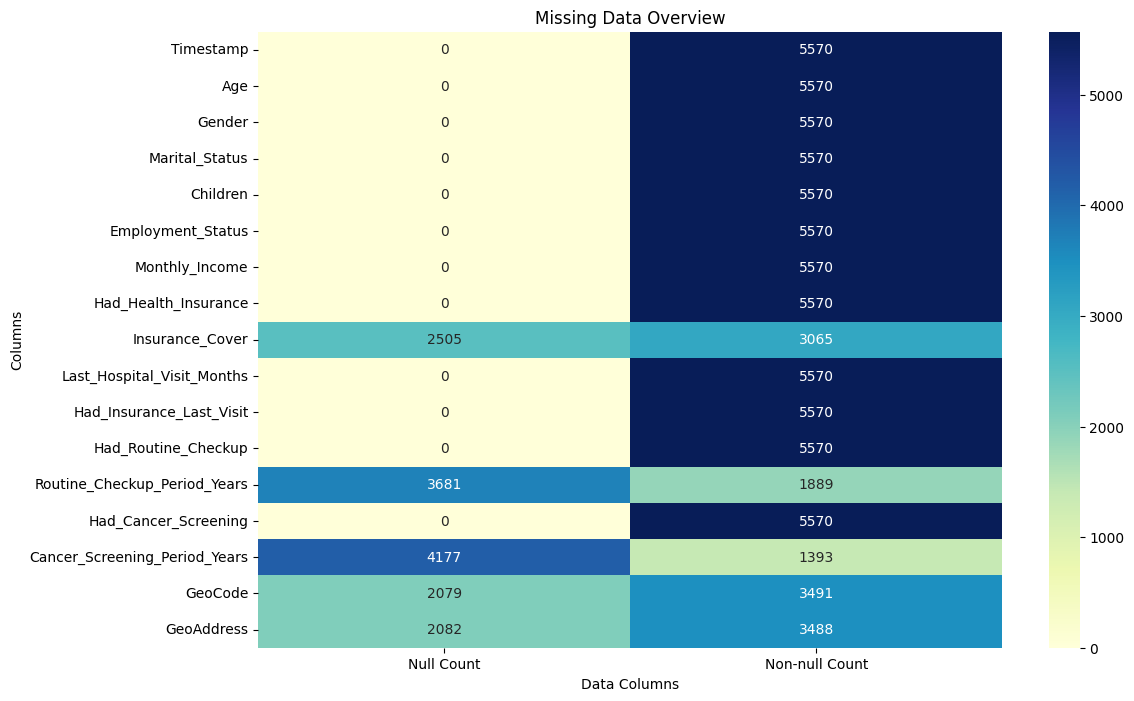

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df_healthcare is your dataframe
# Generate a boolean dataframe indicating null values
null_matrix = df_healthcare.isnull()

# Calculate the percentage of null values in each column
null_percentages = (null_matrix.sum() / null_matrix.shape[0]) * 100

# Create a dataframe combining null counts and percentages
null_summary = pd.DataFrame({'Null Count': null_matrix.sum(), 'Null Percentage': null_percentages})

# Add a column for non-null count
null_summary['Non-null Count'] = df_healthcare.shape[0] - null_summary['Null Count']

# Create a heatmap using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(null_summary[['Null Count', 'Non-null Count']], annot=True, fmt='d', cmap='YlGnBu', cbar=True)
plt.title('Missing Data Overview')
plt.xlabel('Data Columns')
plt.ylabel('Columns')
plt.show()


In [ ]:
df_healthcare.isnull().sum()

Timestamp                           0
Age                                 0
Gender                              0
Marital_Status                      0
Children                            0
Employment_Status                   0
Monthly_Income                      0
Had_Health_Insurance                0
Insurance_Cover                  2505
Last_Hospital_Visit_Months          0
Had_Insurance_Last_Visit            0
Had_Routine_Checkup                 0
Routine_Checkup_Period_Years     3681
Had_Cancer_Screening                0
Cancer_Screening_Period_Years    4177
GeoCode                          2079
GeoAddress                       2082
dtype: int64

In [ ]:

# Columns to replace null values with 'N/A'
columns_to_replace = ['GeoAddress', 'GeoCode', 'Cancer_Screening_Period_Years', 'Routine_Checkup_Period_Years', 'Insurance_Cover']

# Replace NaN values in specified columns with 'N/A'
df_healthcare[columns_to_replace] = df_healthcare[columns_to_replace].fillna('N/A')


In [ ]:
df_healthcare.isnull().sum()

Timestamp                        0
Age                              0
Gender                           0
Marital_Status                   0
Children                         0
Employment_Status                0
Monthly_Income                   0
Had_Health_Insurance             0
Insurance_Cover                  0
Last_Hospital_Visit_Months       0
Had_Insurance_Last_Visit         0
Had_Routine_Checkup              0
Routine_Checkup_Period_Years     0
Had_Cancer_Screening             0
Cancer_Screening_Period_Years    0
GeoCode                          0
GeoAddress                       0
dtype: int64

In [ ]:
df_cleaned = df_healthcare.copy()

In [ ]:
import pandas as pd

# Assuming df_cleaned is your dataframe

# List of columns to convert
columns_to_convert = ['Routine_Checkup_Period_Years', 'Cancer_Screening_Period_Years']

for column in columns_to_convert:
    # Convert the column to numeric, setting errors to 'coerce' to handle non-convertible values
    df_cleaned[column] = pd.to_numeric(df_cleaned[column], errors='coerce')

    # Replace NaN values with Unknown
    df_cleaned[column] = df_cleaned[column].fillna('Unknown')

# Print the updated columns to verify
df_cleaned.head(20)



,Timestamp,Age,Gender,Marital_Status,Children,Employment_Status,Monthly_Income,Had_Health_Insurance,Insurance_Cover,Last_Hospital_Visit_Months,Had_Insurance_Last_Visit,Had_Routine_Checkup,Routine_Checkup_Period_Years,Had_Cancer_Screening,Cancer_Screening_Period_Years,GeoCode,GeoAddress
0,5/14/2024 10:09:43,18-30,Male,Single,0,Student,Less than 10000,Yes,Amaco insurance,30.0,No,No,Unknown,No,Unknown,"-1.2852333,36.8556432","Mvuma Nyuki Street, Off Ole Sinoni Road, PV74+..."
1,5/14/2024 10:16:53,18-30,Male,Single,0,Student,10001-20000,No,N/A,10.0,No,No,Unknown,No,Unknown,"-0.7274496,37.158912","75F5+5GC, Murang'a, Kenya"
2,5/14/2024 10:21:34,18-30,Male,Single,0,Unemployed,Less than 10000,No,N/A,2.0,No,No,Unknown,No,Unknown,"-0.7284222,37.1501468","C71, Kenya"
3,5/14/2024 10:27:40,18-30,Male,Single,0,Unemployed,Less than 10000,No,N/A,11.0,No,No,Unknown,No,Unknown,"-1.2852333,36.8556432","Mvuma Nyuki Street, Off Ole Sinoni Road, PV74+..."
4,5/14/2024 10:34:20,18-30,Male,Single,0,Student,Less than 10000,No,N/A,12.0,No,No,Unknown,No,Unknown,"-1.2841,36.8155","Kenyatta Market, PR88+959, Nairobi, Kenya"
5,5/14/2024 10:41:58,18-30,Male,Single,0,Student,20001-30000,No,N/A,36.0,No,No,Unknown,No,Unknown,"-1.2852333,36.8556432","Mvuma Nyuki Street, Off Ole Sinoni Road, PV74+..."
6,5/14/2024 11:20:25,18-30,Male,Single,0,Student,Less than 10000,No,N/A,2.0,No,No,Unknown,No,Unknown,"-1.2852305,36.8556322","PV74+W6G, Mvuma Nyuki St, Nairobi, Kenya"
7,5/14/2024 11:24:39,31-40,Female,Married,2,Unemployed,20001-30000,Yes,NHIF,5.0,Yes,No,Unknown,No,Unknown,"-1.2852333,36.8556432","Mvuma Nyuki Street, Off Ole Sinoni Road, PV74+..."
8,5/14/2024 11:27:03,18-30,Female,Single,0,Student,Less than 10000,Yes,NHIF,3.0,Yes,No,Unknown,No,Unknown,"-1.2852333,36.8556432","Mvuma Nyuki Street, Off Ole Sinoni Road, PV74+..."
9,5/14/2024 11:35:34,31-40,Male,Married,1,Self-employed,10001-20000,Yes,NHIF,N/A,No,No,Unknown,No,Unknown,"-1.2854283,36.8557163","Off Mvuma Nyuki Street, Opposite Williams Flat..."


In [ ]:
df_healthcare = df_cleaned.copy()

In [ ]:
!pip install pandas word2number

In [ ]:
df = df_healthcare.copy()

In [ ]:
# Updated mapping dictionary
mapping = {
    '0': 0, 0: 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9,
    'Zero': 0, 'one': 1, 'Two': 2, 'Three': 3, 'Four': 4, 'Five': 5, 'Six': 6, 'Seven': 7, 'Eight': 8, 'Nine': 9,
    'none': 0, 'NONE': 0, 'No': 0, 'N/a': 0, 'Nkne': 0, 'Nkne': 0, 'no': 0, 'Nill': 0, 'Nill': 0, 'nil': 0, 'Nope': 0,
    'null': 0, 'Na': 0, 'na': 0, 'Nobe': 0, 'Nobe': 0, 'Nop': 0, 'Nop': 0, 'Nome': 0, 'Mone': 0, 'Any': 0,
    "Don't have": 0, "I don't have children": 0, "DON'T HAVE": 0, 'Nan': 0,
    'one child': 1, '1 child': 1, '1 kid': 1, '1 month ago': 1,
    'two children': 2, '2 children': 2, '2 kids': 2,
    'three children': 3, '3 children': 3, '3 child': 3,
    'four children': 4, '4 children': 4,
    'five children': 5, '5 children': 5,
    'six children': 6, '6 children': 6,
    'seven children': 7, '7 children': 7,
    'eight children': 8, '8 children': 8, '8+': 8,
    'nine children': 9, 'Nine children': 9,
    'ten children': 10, 'Ten': 10,
    'expectant': -1, 'no child': 0, '0 children': 0, 'zero': 0,
    '700,000': 700000,
    'O': 0, 'Null': 0, 'Yes': 0, '60': 60, '13': 13, '<NA>': 0, ' <NA>': 0, 'TWO': 2,
    '0 child': 0,
    'One': 1,
    'One child': 1,
    'Nil': 0,
    'Four children': 4,
    '12': 12,
    'Eight children': 8,
    'Two children': 2,
    'Seven children': 7,
    '11': 11,
    'No children': 0,
    '10': 10,
    'Five children': 5,
    'No child': 0,
    'Three children': 3,
    'Expectant': 1
}

# Set to hold unique unmapped values
unmapped_values = set()

# Function to map values with handling of unmapped values
def map_children(value):
    if value in mapping:
        return mapping[value]
    else:
        unmapped_values.add(value)
        return value

# Apply the mapping function to the 'Children' column
df['Children'] = df['Children'].apply(map_children)

# Explicitly set the column type to object
df['Children'] = df['Children'].astype('object')

# Print the list of unique unmapped values
print("Unique unmapped values:", list(unmapped_values))
df['Children'].value_counts()

Unique unmapped values: []


Children
0         2031
2          984
1          777
3          757
4          470
5          256
6          133
7           75
8           46
9           17
10           9
12           8
11           5
60           1
700000       1
Name: count, dtype: int64

In [ ]:
df_healthcare.value_counts()

Timestamp           Age    Gender  Marital_Status  Children  Employment_Status  Monthly_Income   Had_Health_Insurance  Insurance_Cover  Last_Hospital_Visit_Months  Had_Insurance_Last_Visit  Had_Routine_Checkup  Routine_Checkup_Period_Years  Had_Cancer_Screening  Cancer_Screening_Period_Years  GeoCode                GeoAddress               
06/01/2024 00:25    18-30  Female  Single          0         Unemployed         Less than 10000  No                    N/A              34.0                        No                        No                   Unknown                       No                    Unknown                        -0.5612615,35.1411449  C4QR+FF Litein, Kenya        1
5/28/2024 13:27:04  51-60  Female  Single          3         Employed           Less than 10000  No                    N/A              1.0                         No                        Yes                  3.0                           No                    Unknown                        -1.5380131,37.2

In [ ]:
import pandas as pd
import time
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

# Assuming df_cleaned is your DataFrame and 'GeoCode' is the column with longitude and latitude
geo_column = 'GeoCode'

# Drop rows where GeoCode is null
df_cleaned = df_cleaned.dropna(subset=[geo_column])

# Split the 'GeoCode' column into two separate columns for latitude and longitude
df_cleaned[['Latitude', 'Longitude']] = df_cleaned[geo_column].str.split(',', expand=True)

# Convert the latitude and longitude columns to float
df_cleaned['Latitude'] = df_cleaned['Latitude'].astype(float)
df_cleaned['Longitude'] = df_cleaned['Longitude'].astype(float)

# Define the function to get the county from latitude and longitude
def get_county(latitude, longitude):
    geolocator = Nominatim(user_agent="kenyan_counties")
    while True:
        try:
            location = geolocator.reverse(f"{latitude}, {longitude}", timeout=10)
            address = location.raw['address']
            county = address.get('county')
            return county
        except GeocoderTimedOut:
            print("Geocoding request timed out. Retrying...")
            time.sleep(0.1)

# Apply the get_county function to each row in the DataFrame
df_cleaned['County'] = df_cleaned.apply(lambda row: get_county(row['Latitude'], row['Longitude']), axis=1)

# Drop the temporary Latitude and Longitude columns if desired
df_cleaned.drop(columns=['Latitude', 'Longitude'], inplace=True)

# Print the DataFrame to verify
df_cleaned.head()


,Timestamp,Age,Gender,Marital_Status,Children,Employment_Status,Monthly_Income,Had_Health_Insurance,Insurance_Cover,Last_Hospital_Visit_Months,Had_Insurance_Last_Visit,Had_Routine_Checkup,Routine_Checkup_Period_Years,Had_Cancer_Screening,Cancer_Screening_Period_Years,GeoCode,GeoAddress,County
0,5/14/2024 10:09:43,18-30,Male,Single,NaN,Student,Less than 10000,Yes,Amaco insurance,30.0,No,No,0,No,0,"-1.2852333,36.8556432","Mvuma Nyuki Street, Off Ole Sinoni Road, PV74+...",None
1,5/14/2024 10:16:53,18-30,Male,Single,NaN,Student,10001-20000,No,NaN,10.0,No,No,0,No,0,"-0.7274496,37.158912","75F5+5GC, Murang'a, Kenya",Kiharu
2,5/14/2024 10:21:34,18-30,Male,Single,NaN,Unemployed,Less than 10000,No,NaN,2.0,No,No,0,No,0,"-0.7284222,37.1501468","C71, Kenya",Kiharu
3,5/14/2024 10:27:40,18-30,Male,Single,NaN,Unemployed,Less than 10000,No,NaN,11.0,No,No,0,No,0,"-1.2852333,36.8556432","Mvuma Nyuki Street, Off Ole Sinoni Road, PV74+...",None
4,5/14/2024 10:34:20,18-30,Male,Single,0,Student,Less than 10000,No,NaN,12.0,No,No,0,No,0,"-1.2841,36.8155","Kenyatta Market, PR88+959, Nairobi, Kenya",None


In [ ]:
df_healthcare = df_cleaned.copy()

In [ ]:
# prompt: save the df_healthcare to my computer

df_healthcare.to_csv('healthcare_clean.csv')
files.download('healthcare_clean.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_healthcare.head()

,Timestamp,Age,Gender,Marital_Status,Children,Employment_Status,Monthly_Income,Had_Health_Insurance,Insurance_Cover,Last_Hospital_Visit_Months,Had_Insurance_Last_Visit,Had_Routine_Checkup,Routine_Checkup_Period_Years,Had_Cancer_Screening,Cancer_Screening_Period_Years,GeoCode,GeoAddress,County
0,5/14/2024 10:09:43,18-30,Male,Single,NaN,Student,Less than 10000,Yes,Amaco insurance,30.0,No,No,0,No,0,"-1.2852333,36.8556432","Mvuma Nyuki Street, Off Ole Sinoni Road, PV74+...",None
1,5/14/2024 10:16:53,18-30,Male,Single,NaN,Student,10001-20000,No,NaN,10.0,No,No,0,No,0,"-0.7274496,37.158912","75F5+5GC, Murang'a, Kenya",Kiharu
2,5/14/2024 10:21:34,18-30,Male,Single,NaN,Unemployed,Less than 10000,No,NaN,2.0,No,No,0,No,0,"-0.7284222,37.1501468","C71, Kenya",Kiharu
3,5/14/2024 10:27:40,18-30,Male,Single,NaN,Unemployed,Less than 10000,No,NaN,11.0,No,No,0,No,0,"-1.2852333,36.8556432","Mvuma Nyuki Street, Off Ole Sinoni Road, PV74+...",None
4,5/14/2024 10:34:20,18-30,Male,Single,0,Student,Less than 10000,No,NaN,12.0,No,No,0,No,0,"-1.2841,36.8155","Kenyatta Market, PR88+959, Nairobi, Kenya",None
